Use this cell for all your imports

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [3]:
G = nx.DiGraph()

with open("data.txt", "r") as f:
    # Skip over any lines that start with "#" or contain only whitespace
    for line in f:
        line = line.strip()
        if line.startswith("#") or not line:
            continue
        
        # Parse the source and destination nodes of the edge
        u, v = map(int, line.split())
        G.add_edge(u, v)


Use this cell to normalize the matrix as you see fit.

In [4]:
# Load the graph from the file
G = nx.read_edgelist("data.txt", nodetype=int, create_using=nx.DiGraph())

# Get the adjacency matrix as a numpy array
A = nx.to_numpy_array(G)

# Normalize the matrix to make it stochastic
out_degree = A.sum(axis=1)
D = np.diag(out_degree + 1e-6) # Add a small constant to ensure invertibility
P = np.linalg.inv(D) @ A

# P now represents the normalized stochastic matrix for the graph


Apply the PageRank algorithm to the matrix you created.

In [5]:
# Apply the power iteration method to compute PageRank
alpha = 0.85 # damping factor
n = P.shape[0] # number of nodes
r = np.ones(n) / n # initial PageRank vector
tol = 1e-6 # convergence tolerance
max_iter = 100 # maximum number of iterations

for i in range(max_iter):
    r_new = alpha * (P @ r) + (1 - alpha) / n
    if np.linalg.norm(r_new - r) < tol:
        break
    r = r_new

# r now represents the PageRank vector for the graph


Output a list of the 100 most important papers along with their importance

In [6]:
# Create a mapping from node IDs to indices in the PageRank vector
id_to_index = {id: i for i, id in enumerate(G.nodes())}

# Get the indices of the top 100 nodes by PageRank score
idx = np.argsort(r)[::-1][:100]

# Print the ID and PageRank score for each of the top 100 nodes
for i in idx:
    node_id = list(G.nodes())[i]
    pagerank_score = r[i]
    print(f"Node ID: {node_id}, PageRank Score: {pagerank_score}")


Node ID: 10273, PageRank Score: 3.600989391853544e-05
Node ID: 9301082, PageRank Score: 3.600989391853544e-05
Node ID: 9201015, PageRank Score: 3.600989391853544e-05
Node ID: 6187, PageRank Score: 3.600989391853544e-05
Node ID: 9207016, PageRank Score: 3.600989391853544e-05
Node ID: 9206056, PageRank Score: 3.600989391853544e-05
Node ID: 9404069, PageRank Score: 3.600989391853544e-05
Node ID: 9404072, PageRank Score: 3.600989391853544e-05
Node ID: 205224, PageRank Score: 3.600989391853544e-05
Node ID: 9308141, PageRank Score: 3.600989391853544e-05
Node ID: 9308150, PageRank Score: 3.600989391853544e-05
Node ID: 9307086, PageRank Score: 3.600989391853544e-05
Node ID: 201090, PageRank Score: 2.9972285336989957e-05
Node ID: 111056, PageRank Score: 2.9718886763189668e-05
Node ID: 203087, PageRank Score: 2.9684154884759073e-05
Node ID: 304075, PageRank Score: 2.95414489586478e-05
Node ID: 9810028, PageRank Score: 2.9423142442436335e-05
Node ID: 107042, PageRank Score: 2.9175075495770925e-05

Visualize your results

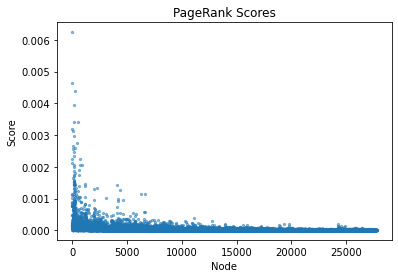

In [7]:
# Get the PageRank scores for the nodes in the graph
pagerank_scores = np.array(list(nx.pagerank(G).values()))

# Create a scatter plot of the PageRank scores
plt.scatter(range(len(pagerank_scores)), pagerank_scores, s=5, alpha=0.5)
plt.title("PageRank Scores")
plt.xlabel("Node")
plt.ylabel("Score")
plt.show()
